In [1]:
import numpy as np
import pandas as pd

In [2]:
with open('Spam.csv', 'r', encoding='utf-8', errors='replace') as file:
    df = pd.read_csv(file)


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1815,ham,Sian... Aft meeting supervisor got work 2 do l...,NaN,NaN,NaN
4259,ham,Are you plans with your family set in stone ?,NaN,NaN,NaN
4229,ham,And several to you sir.,NaN,NaN,NaN
1801,ham,I wanna watch that movie,NaN,NaN,NaN
1298,ham,Your daily text from me ��� a favour this time,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data Cleaning
# 2. EDA(Exploratory Data Analysis)
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Imporvements
# 7. Converting into website
# 8. Deploying this in Heroku

# 1. DATA CLEANING

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
2472,spam,Final Chance! Claim ur �150 worth of discount ...
3965,ham,I was just callin to say hi. Take care bruv!
765,spam,UR awarded a City Break and could WIN a �200 S...
1705,ham,Yun ah.now �_ wkg where?btw if �_ go nus sc. �...
3068,ham,Ay wana meet on sat?�_ wkg on sat?


In [9]:
# Renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3230,ham,No plm i will come da. On the way.
2782,ham,Well at this right I'm gonna have to get up an...
2560,ham,Are you still getting the goods.
4633,ham,These won't do. Have to move on to morphine
511,ham,Prabha..i'm soryda..realy..frm heart i'm sory


In [10]:
# Encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# Missing Values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# Check for duplicate values
df.duplicated().sum()

403

In [15]:
# Remove Duplicates
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# 2. EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

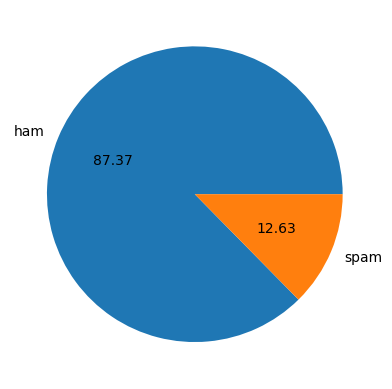

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
# Data is imbalanced here ham is more as compared to spam

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
# How to count no. of characters(length)
df['num_characters']=df['text'].apply(len)

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
# How to count no. of words(length)
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, �_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [27]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123782,1.820195
std,56.356802,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

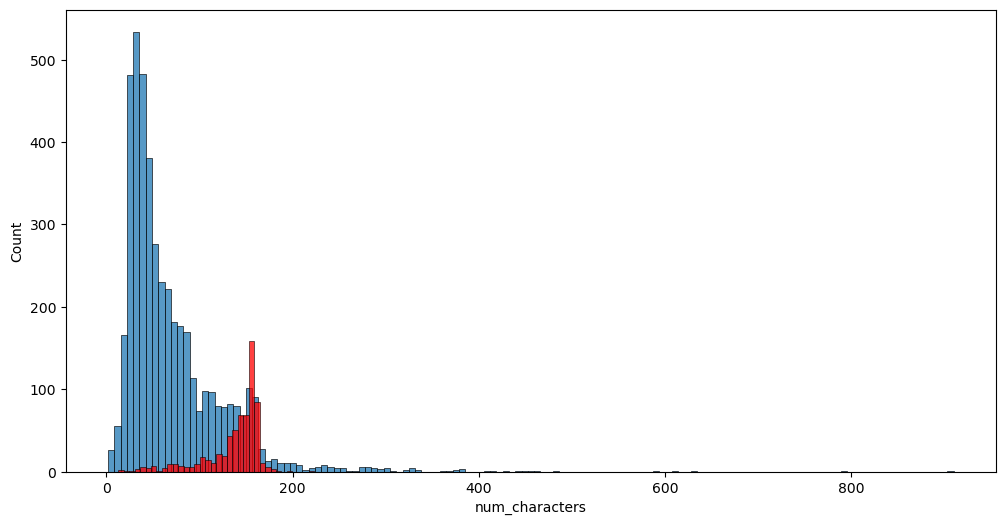

In [34]:
# Histogram for ham and spam classes
# 1. for no. of characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

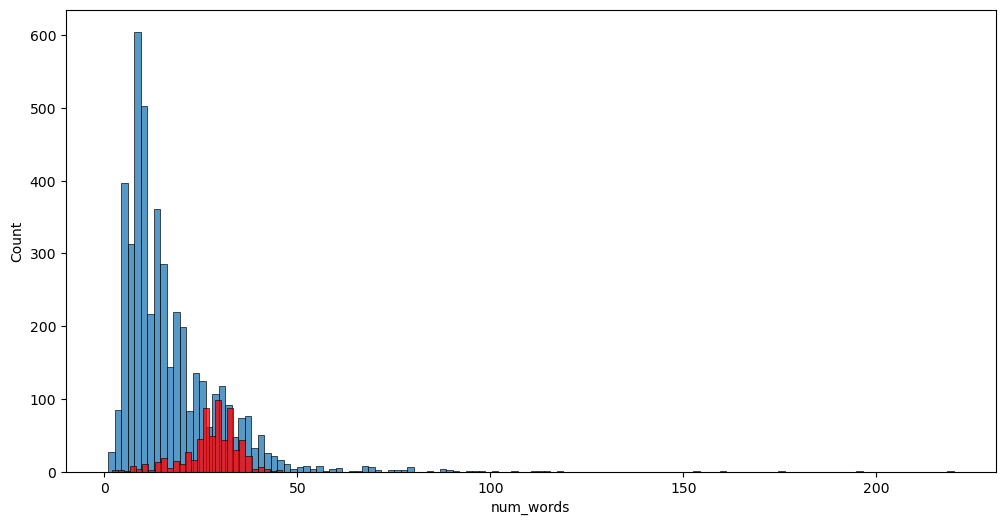

In [35]:
# 2. for no. of words
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

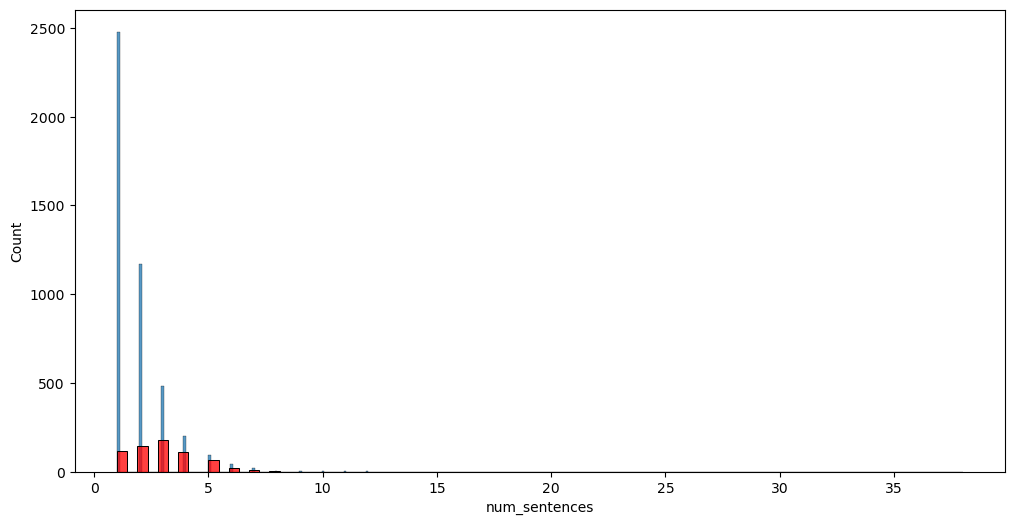

In [36]:
# 2. for no. of sentences
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


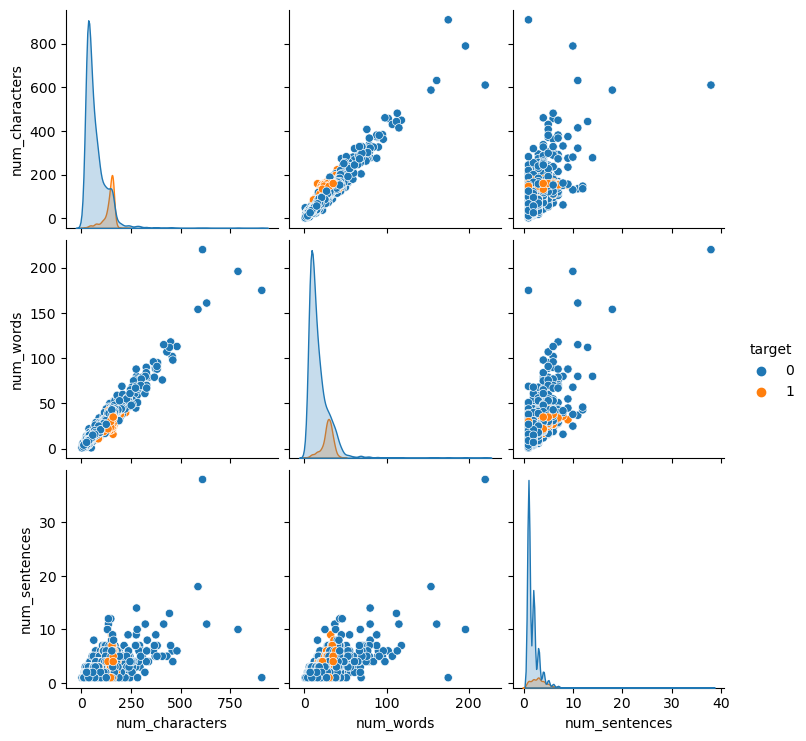

In [37]:
sns.pairplot(df,hue='target')

<Axes: >

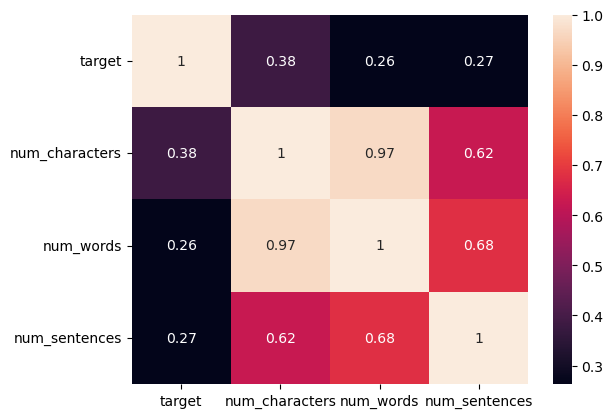

In [38]:
#correlation coefficient
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(),annot=True)

# 3. DATA/TEXT PREPROCESSING
- Lower Case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming


In [39]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
# creating a function to perform all above function
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y = []
    
    for i in text:
        if i.isalnum():
            y.append(i) 
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
       
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [42]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [43]:
transform_text('I loved the YT lectures on Machine Learning .How about you? ')

'love yt lectur machin learn'

In [44]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [45]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [46]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [47]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [48]:
# Creating transformed column
df['transformed_text']=df['text'].apply(transform_text)

In [49]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [50]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [51]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

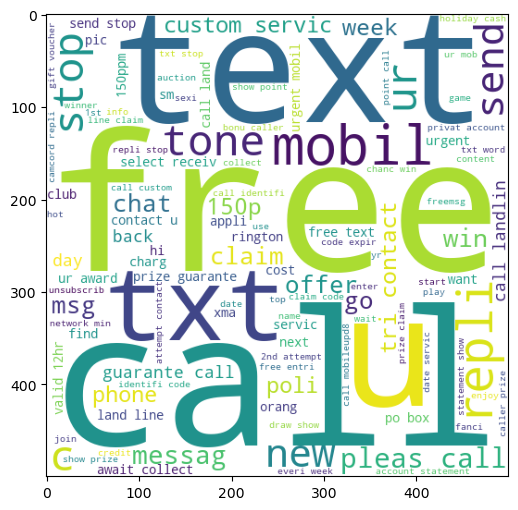

In [52]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [53]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

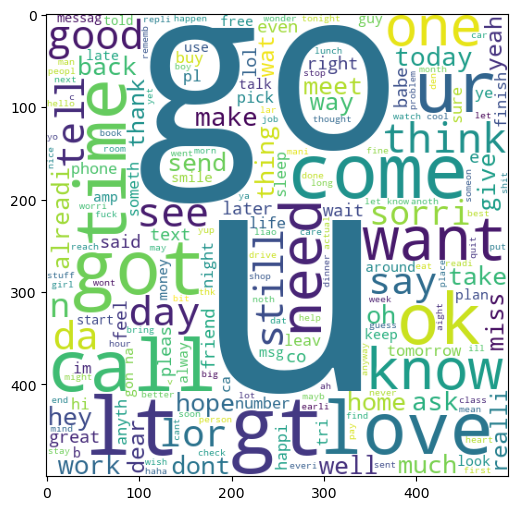

In [54]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)


# Top 30 words 

In [55]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [56]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [57]:
len(spam_corpus)

9941

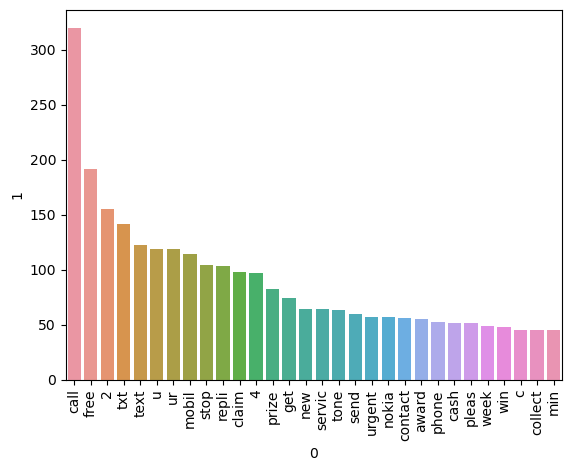

In [58]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [59]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [60]:
len(ham_corpus)

35305

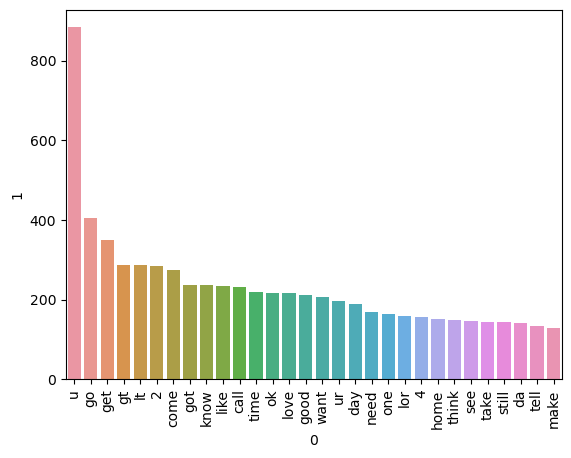

In [61]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. MODEL BUILDING BASED ON NAIVE BAYES(for textual data )

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [63]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [64]:
X.shape

(5169, 6677)

In [65]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [66]:
y=df['target'].values

In [67]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [70]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [71]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [72]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8781431334622823
[[790 106]
 [ 20 118]]
0.5267857142857143


In [73]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.965183752417795
[[872  24]
 [ 12 126]]
0.84


In [74]:
bnb.fit(X_train,y_train) # this is best 
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.971953578336557
[[894   2]
 [ 27 111]]
0.9823008849557522


In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [118]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [77]:
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()
#X=scaler.fit_transform(X)

In [78]:
#appending the num_character col to X
#X=np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [119]:
X.shape

(5169, 3000)

In [120]:
y=df['target'].values

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [123]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [84]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8704061895551257
[[788 108]
 [ 26 112]]
0.509090909090909


In [124]:
mnb.fit(X_train,y_train)# this is best
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [86]:
bnb.fit(X_train,y_train) 
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [87]:
#tfidf --> MNB(best choosed)

In [88]:
from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


#clf = SVC(kernel='rbf')

In [89]:
#svc=SVC(kernel='sigmod')
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(penalty='l2',random_state=0)
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [90]:
clfs = {
    #'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [91]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [92]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.971953578336557, 1.0)

In [93]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy,current_precision =  train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy -",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  KN
Accuracy - 0.9052224371373307
Precision -  1.0
For  NB
Accuracy - 0.971953578336557
Precision -  1.0
For  DT
Accuracy - 0.9313346228239845
Precision -  0.8252427184466019
For  LR
Accuracy - 0.9516441005802708
Precision -  0.9782608695652174
For  RF
Accuracy - 0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy - 0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy - 0.9593810444874274
Precision -  0.8692307692307693
For  ETC
Accuracy - 0.9796905222437138
Precision -  0.975609756097561
For  GBDT
Accuracy - 0.9468085106382979
Precision -  0.9278350515463918
For  xgb
Accuracy - 0.9680851063829787
Precision -  0.9411764705882353


In [94]:
performance_df=pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [95]:
performance_df 

,Algorithm,Accuracy,Precision
0,KN,0.905222,1.000000
1,NB,0.971954,1.000000
4,RF,0.974855,0.982759
3,LR,0.951644,0.978261
7,ETC,0.979691,0.975610
5,AdaBoost,0.961315,0.945455
9,xgb,0.968085,0.941176
8,GBDT,0.946809,0.927835
6,BgC,0.959381,0.869231
2,DT,0.931335,0.825243


In [96]:
# Model Improve
# 1. Change the max_features parametes of Tfidf

In [97]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_mac_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [98]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_mac_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.971954,1.000000,0.971954,1.000000
2,RF,0.974855,0.982759,0.974855,0.982759
3,LR,0.951644,0.978261,0.951644,0.978261
4,ETC,0.979691,0.975610,0.979691,0.975610
5,AdaBoost,0.961315,0.945455,0.961315,0.945455
6,xgb,0.968085,0.941176,0.968085,0.941176
7,GBDT,0.946809,0.927835,0.946809,0.927835
8,BgC,0.959381,0.869231,0.959381,0.869231
9,DT,0.931335,0.825243,0.931335,0.825243


In [108]:
#Voting Classifier
mnb = MultinomialNB()
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
knc=KNeighborsClassifier()

from sklearn.ensemble import VotingClassifier

In [109]:
voting=VotingClassifier(estimators=[('nb',mnb),('rf',rfc),('kn',knc)])

In [110]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('kn', KNeighborsClassifier())])

In [111]:
y_pred = voting.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precsion',precision_score(y_test,y_pred))

Accuracy 0.9709864603481625
Precsion 1.0


In [112]:
#Applying stacking
estimators=[('nb',mnb),('rf',rfc),('kn',knc)]
final_estimator=RandomForestClassifier()

In [113]:
from sklearn.ensemble import StackingClassifier


In [114]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [115]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precsion',precision_score(y_test,y_pred))

Accuracy 0.9690522243713733
Precsion 0.8897058823529411


In [125]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))